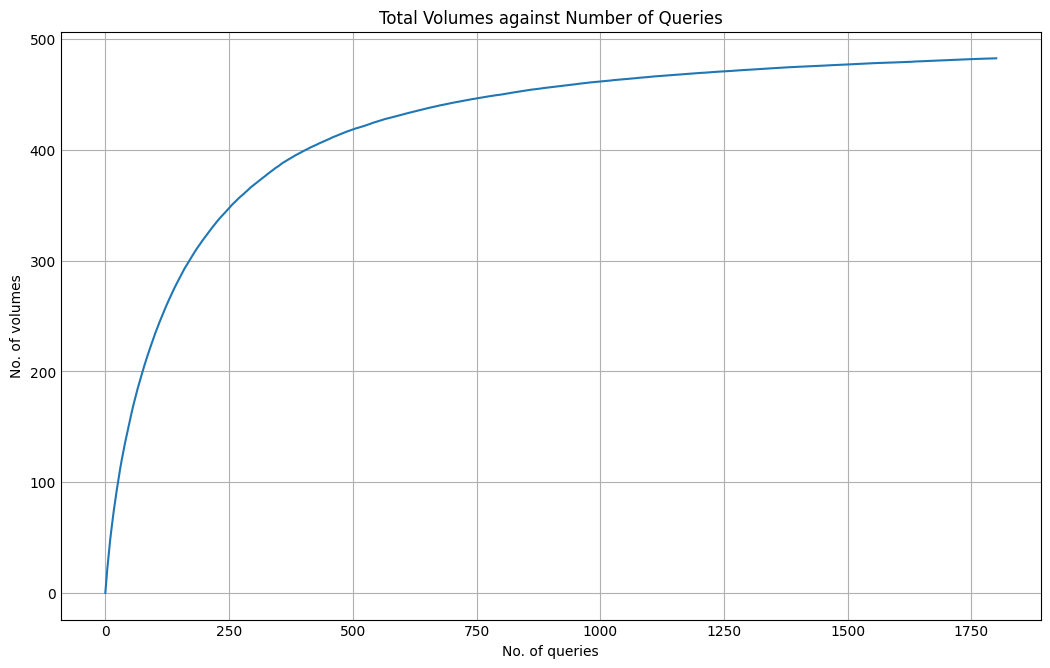

In [62]:
import math 
import random 
import matplotlib.pyplot as plt 

def query_gen():
    query_range_list = []
    for i in range (RSEmax):
        for j in range (i+1):
            query_range_list.append(j)
    no_range = random.choice(query_range_list)

    first_int = random.randint(1, RSEmax-no_range)
    query = (first_int, first_int+no_range)
    return(query)



def cover_log(start_int, end_int):
    c = 0
    query_list = []
    while start_int <= end_int:
        c = start_int
        for i in range(int(math.log(RSEmax, 2)+1)):
            if start_int + (2**i -1) > end_int:
                break
            else:    
                c = start_int + (2**i -1)
            if start_int % 2**(i+1) !=  1:
                break
        node = (start_int, c)
        query_list.append(node)
        start_int = c+1
    return(query_list)





RSEmax = 256
max_volumes = int(RSEmax*2 - 1)
no_of_runs = 200
no_of_queries = 1800
def log_query(no_of_runs,no_of_queries):
    arr = [0 for i in range(no_of_queries+1)]
    for h in range(no_of_runs):
        vol_tracker = []
        vol_sum = 0
        query_tracker = []
        for j in range(no_of_queries):
            query_asked = query_gen()
            if len(vol_tracker) == max_volumes: 
                for i in range(max_volumes, no_of_queries):
                    arr[i+1] = max_volumes*no_of_runs
                break   
            if len(query_tracker) == int((RSEmax*(RSEmax + 1))/2):
                break   
            else:
                query_tracker.append(query_asked)
                (a,b) = query_asked
                query_list = cover_log(a,b)
                for i in query_list:
                    if i not in vol_tracker:
                        vol_tracker.append(i)
                        vol_sum +=1
                arr[j+1] = arr[j+1] + vol_sum
                
    for i in range(no_of_queries):
        arr[i+1] = arr[i+1] /no_of_runs
    return(arr)

arr = log_query(no_of_runs,no_of_queries) 

plt.style.use('_mpl-gallery')
plt.figure(figsize=(10,6))
plt.plot(arr)
plt.xlabel("No. of queries")  
plt.ylabel("No. of volumes")  
plt.title("Total Volumes against Number of Queries")  
plt.show()



